# Introduction & problem description

## Introduction

### Millions of people are using Twitter and expressing their emotions like happiness, sadness, angry, etc. The Sentiment analysis is also about detecting the emotions, opinion, assessment, attitudes, and took this into consideration as a way humans think. Sentiment analysis classifies the emotions into classes such as positive or negative. Nowadays, industries are interested to use textual data for semantic analysis to extract the view of people about their products and services. Sentiment analysis is very important for them to know the customer satisfaction level and they can improve their services accordingly. To work on the text data, they try to extract the data from social media platforms. There are a lot of social media sites like Google Plus, Facebook, and Twitter that allow expressing opinions, views, and emotions about certain topics and events. Microblogging site Twitter is expanding rapidly among all other online social media networking sites with about 200 million users. Twitter was founded in 2006 and currently, it is the most famous microblogging platform. In 2017 2 million users shared 8.3 million tweets in one hour. Twitter users use to post their thoughts, emotions, and messages on their profiles, called tweets. Words limit of a single tweet has 140 characters. Twitter sentiment analysis based on the NLP (natural language processing) field. For tweets text, we use NLP techniques like tokenizing the words, removing the stop words like I, me, my, our, your, is, was, etc. Natural language processing also plays a part to preprocess the data like cleaning the text and removing the special characters and punctuation marks. Sentimental analysis is very important because we can know the trends of people’s emotions on specific topics with their tweets.



## Problem description

### To devise a sentimental analyzer for overcoming the challenges to identify the twitter tweets text sentiments (positive, negative) by using naive bayes , support vector classifier and logistic regression

## Labraries importing

In [6]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use("ggplot")
from sklearn.metrics import classification_report, confusion_matrix
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from sklearn.model_selection import train_test_split
from mlxtend.plotting import plot_confusion_matrix
from nltk.tokenize import RegexpTokenizer
import re
import string
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import TfidfVectorizer

import warnings

warnings.filterwarnings("ignore")

## Loading data

In [9]:
# loading data set
data = pd.read_csv("data set.csv", encoding="ISO-8859-1", engine="python")
data.columns = ["Sentiment", "Time", "Date", "Query", "Username", "Tweet"]

# Exploratory data analysis 

In [11]:
data.head()

,Sentiment,Time,Date,Query,Username,Tweet
0,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
1,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
2,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
3,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
4,0,1467811372,Mon Apr 06 22:20:00 PDT 2009,NO_QUERY,joy_wolf,@Kwesidei not the whole crew


In [12]:
data.tail()

,Sentiment,Time,Date,Query,Username,Tweet
1599994,4,2193601966,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,AmandaMarie1028,Just woke up. Having no school is the best fee...
1599995,4,2193601969,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,TheWDBoards,TheWDB.com - Very cool to hear old Walt interv...
1599996,4,2193601991,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,bpbabe,Are you ready for your MoJo Makeover? Ask me f...
1599997,4,2193602064,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,tinydiamondz,Happy 38th Birthday to my boo of alll time!!! ...
1599998,4,2193602129,Tue Jun 16 08:40:50 PDT 2009,NO_QUERY,RyanTrevMorris,happy #charitytuesday @theNSPCC @SparksCharity...


In [13]:
# length of data
print("lenght of data is :", len(data))

lenght of data is : 1599999


In [14]:
# Shape of data
data.shape

(1599999, 6)

In [15]:
# Information about data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599999 entries, 0 to 1599998
Data columns (total 6 columns):
 #   Column     Non-Null Count    Dtype 
---  ------     --------------    ----- 
 0   Sentiment  1599999 non-null  int64 
 1   Time       1599999 non-null  int64 
 2   Date       1599999 non-null  object
 3   Query      1599999 non-null  object
 4   Username   1599999 non-null  object
 5   Tweet      1599999 non-null  object
dtypes: int64(2), object(4)
memory usage: 73.2+ MB


In [16]:
# Data types of all features
data.dtypes

Sentiment     int64
Time          int64
Date         object
Query        object
Username     object
Tweet        object
dtype: object

In [17]:
# Checking Null values
data.isnull().mean()

Sentiment    0.0
Time         0.0
Date         0.0
Query        0.0
Username     0.0
Tweet        0.0
dtype: float64

In [18]:
# Describtion for data
data.describe()

,Sentiment,Time
count,1.599999e+06,1.599999e+06
mean,2.000001e+00,1.998818e+09
std,2.000001e+00,1.935757e+08
min,0.000000e+00,1.467811e+09
25%,0.000000e+00,1.956916e+09
50%,4.000000e+00,2.002102e+09
75%,4.000000e+00,2.177059e+09
max,4.000000e+00,2.329206e+09


# Data Preparation

In [30]:
# Selecting the text and label coloumn
data = data[["Tweet", "Sentiment"]]
data

,Tweet,Sentiment
0,is upset that he can't update his Facebook by ...,0
1,@Kenichan I dived many times for the ball. Man...,0
2,my whole body feels itchy and like its on fire,0
3,"@nationwideclass no, it's not behaving at all....",0
4,@Kwesidei not the whole crew,0
...,...,...
1599994,Just woke up. Having no school is the best fee...,4
1599995,TheWDB.com - Very cool to hear old Walt interv...,4
1599996,Are you ready for your MoJo Makeover? Ask me f...,4
1599997,Happy 38th Birthday to my boo of alll time!!! ...,4


In [32]:
# Assigning 1 to Positive sentment 4
data["Sentiment"][data["Sentiment"] == 4] = 1
data

,Tweet,Sentiment
0,is upset that he can't update his Facebook by ...,0
1,@Kenichan I dived many times for the ball. Man...,0
2,my whole body feels itchy and like its on fire,0
3,"@nationwideclass no, it's not behaving at all....",0
4,@Kwesidei not the whole crew,0
...,...,...
1599994,Just woke up. Having no school is the best fee...,1
1599995,TheWDB.com - Very cool to hear old Walt interv...,1
1599996,Are you ready for your MoJo Makeover? Ask me f...,1
1599997,Happy 38th Birthday to my boo of alll time!!! ...,1


Text(0.5, 1.0, 'Sentiment Data Distribution')

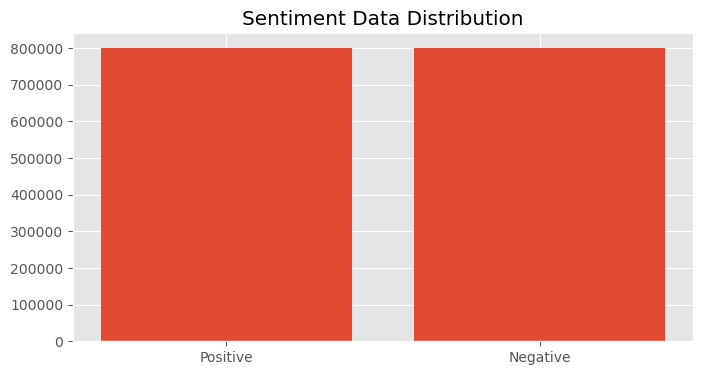

In [34]:
val_count = data.Sentiment.value_counts()

plt.figure(figsize=(8, 4))
plt.bar(("Positive", "Negative"), val_count.values)
plt.title("Sentiment Data Distribution")

In [36]:
# Making statement text in lower case
data["Tweet"] = data["Tweet"].str.lower()
data["Tweet"].tail()

1599994    just woke up. having no school is the best fee...
1599995    thewdb.com - very cool to hear old walt interv...
1599996    are you ready for your mojo makeover? ask me f...
1599997    happy 38th birthday to my boo of alll time!!! ...
1599998    happy #charitytuesday @thenspcc @sparkscharity...
Name: Tweet, dtype: object

In [38]:
# Cleaning and removing Stop words
stopwords_list = stopwords.words("english")

In [40]:
", ".join(stopwords.words("english"))

"i, me, my, myself, we, our, ours, ourselves, you, you're, you've, you'll, you'd, your, yours, yourself, yourselves, he, him, his, himself, she, she's, her, hers, herself, it, it's, its, itself, they, them, their, theirs, themselves, what, which, who, whom, this, that, that'll, these, those, am, is, are, was, were, be, been, being, have, has, had, having, do, does, did, doing, a, an, the, and, but, if, or, because, as, until, while, of, at, by, for, with, about, against, between, into, through, during, before, after, above, below, to, from, up, down, in, out, on, off, over, under, again, further, then, once, here, there, when, where, why, how, all, any, both, each, few, more, most, other, some, such, no, nor, not, only, own, same, so, than, too, very, s, t, can, will, just, don, don't, should, should've, now, d, ll, m, o, re, ve, y, ain, aren, aren't, couldn, couldn't, didn, didn't, doesn, doesn't, hadn, hadn't, hasn, hasn't, haven, haven't, isn, isn't, ma, mightn, mightn't, mustn, mus

In [42]:
# Cleaning and removing the above stop words list from the tweet text
STOPWORDS = set(stopwords.words("english"))


def cleaning_stopwords(text):
    return " ".join([word for word in str(text).split() if word not in STOPWORDS])


data["Tweet"] = data["Tweet"].apply(lambda text: cleaning_stopwords(text))
data["Tweet"].head()

0    upset can't update facebook texting it... migh...
1    @kenichan dived many times ball. managed save ...
2                     whole body feels itchy like fire
3    @nationwideclass no, behaving all. i'm mad. he...
4                                 @kwesidei whole crew
Name: Tweet, dtype: object

In [43]:
# Cleaning and removing punctuations
english_punctuations = string.punctuation
punctuations_list = english_punctuations


def cleaning_punctuations(text):
    translator = str.maketrans("", "", punctuations_list)
    return text.translate(translator)

In [46]:
data["Tweet"] = data["Tweet"].apply(lambda x: cleaning_punctuations(x))
data["Tweet"].tail()

1599994                     woke up school best feeling ever
1599995    thewdbcom  cool hear old walt interviews â« h...
1599996                      ready mojo makeover ask details
1599997    happy 38th birthday boo alll time tupac amaru ...
1599998    happy charitytuesday thenspcc sparkscharity sp...
Name: Tweet, dtype: object

In [47]:
# Replace all non alphabets
def cleaning_non_alphabets(text):
    return re.sub(r"[\W]^\s", "", text)


data["Tweet"] = data["Tweet"].apply(lambda x: cleaning_non_alphabets(x))
data["Tweet"].tail()

1599994                     woke up school best feeling ever
1599995    thewdbcom  cool hear old walt interviews â« h...
1599996                      ready mojo makeover ask details
1599997    happy 38th birthday boo alll time tupac amaru ...
1599998    happy charitytuesday thenspcc sparkscharity sp...
Name: Tweet, dtype: object

In [48]:
# Cleaning and removing repeating characters
def cleaning_repeating_char(text):
    return re.sub(r"(.)\1+", r"\1", text)

In [49]:
data["Tweet"] = data["Tweet"].apply(lambda x: cleaning_repeating_char(x))
data["Tweet"].tail()

1599994                       woke up schol best feling ever
1599995    thewdbcom col hear old walt interviews â« htp...
1599996                      ready mojo makeover ask details
1599997     hapy 38th birthday bo al time tupac amaru shakur
1599998    hapy charitytuesday thenspc sparkscharity spea...
Name: Tweet, dtype: object

In [50]:
# Cleaning and removing email
def cleaning_email(data):
    return re.sub("@[^\s]+", " ", data)


data["Tweet"] = data["Tweet"].apply(lambda x: cleaning_email(x))
data["Tweet"].tail()

1599994                       woke up schol best feling ever
1599995    thewdbcom col hear old walt interviews â« htp...
1599996                      ready mojo makeover ask details
1599997     hapy 38th birthday bo al time tupac amaru shakur
1599998    hapy charitytuesday thenspc sparkscharity spea...
Name: Tweet, dtype: object

In [52]:
# Cleaning and removing URL's
def cleaning_URLs(data):
    return re.sub("((www\.[^\s]+)|(https?://[^\s]+))", " ", data)


data["Tweet"] = data["Tweet"].apply(lambda x: cleaning_URLs(x))
data["Tweet"].tail()

1599994                       woke up schol best feling ever
1599995    thewdbcom col hear old walt interviews â« htp...
1599996                      ready mojo makeover ask details
1599997     hapy 38th birthday bo al time tupac amaru shakur
1599998    hapy charitytuesday thenspc sparkscharity spea...
Name: Tweet, dtype: object

In [55]:
# Cleaning and removing Numeric numbers
def cleaning_numbers(data):
    return re.sub("[0-9]+", "", data)


data["Tweet"] = data["Tweet"].apply(lambda x: cleaning_numbers(x))
data["Tweet"].tail()

1599994                       woke up schol best feling ever
1599995    thewdbcom col hear old walt interviews â« htp...
1599996                      ready mojo makeover ask details
1599997       hapy th birthday bo al time tupac amaru shakur
1599998    hapy charitytuesday thenspc sparkscharity spea...
Name: Tweet, dtype: object

In [ ]:
# TF-IDF Vectoriser

In [ ]:
* TF-IDF indicates what the importance of the word is in order to understand the document or dataset.
  
* `TF-IDF Vectoriser` converts a collection of raw documents to a matrix of TF-IDF features. The Vectoriser is usually trained on only the X_train dataset
* `ngram_range` is the range of number of words in a sequence. [e.g "very expensive" is a 2-gram that is considered as an extra feature separately from "very" and "expensive" when you have a n-gram range of (1,2)]
* `max_features` specifies the number of features to consider. [Ordered by feature frequency across the corpus].

![image.png](attachment:2af9b58b-3bbc-435f-b126-518240789b2b.png)



In [ ]:
vectoriser = TfidfVectorizer(ngram_range=(1, 2), max_features=500000)
vectoriser.fit(X_train)
# print(f'Vectoriser fitted.')
# print('No. of feature_words: ', len(vectoriser.get_feature_names_out()))

In [ ]:
print("No. of feature_words: ", len(vectoriser.get_feature_names_out()))

In [ ]:
X_train = vectoriser.transform(X_train)
X_test = vectoriser.transform(X_test)
print(f"Data Transformed.")

In [ ]:
# Creating and Evaluating Models


In [ ]:
## Evaluate Model Function

In [ ]:
def model_Evaluate(model):

    # Predict values for Test dataset
    Y_pred = model.predict(X_test)

    # Print the evaluation metrics for the dataset.
    print(classification_report(Y_test, Y_pred))

    # Compute and plot the Confusion matrix
    cf_matrix = confusion_matrix(Y_test, Y_pred)

    categories = ["Negative", "Positive"]
    group_names = ["True Neg", "False Pos", "False Neg", "True Pos"]
    group_percentages = [
        "{0:.2%}".format(value) for value in cf_matrix.flatten() / np.sum(cf_matrix)
    ]

    labels = [f"{v1}\n{v2}" for v1, v2 in zip(group_names, group_percentages)]
    labels = np.asarray(labels).reshape(2, 2)

    sns.heatmap(
        cf_matrix,
        annot=labels,
        cmap="Blues",
        fmt="",
        xticklabels=categories,
        yticklabels=categories,
    )

    plt.xlabel("Predicted values", fontdict={"size": 14}, labelpad=10)
    plt.ylabel("Actual values", fontdict={"size": 14}, labelpad=10)
    plt.title("Confusion Matrix", fontdict={"size": 18}, pad=20)